# Languages Popularity by Year
# Question N°1
This notebook purpose is to answer the First Question: </br>
<b><i>"What languages were the most popular in each year?"</i></b>


In order to do so, I would need previously loaded data about surveys.

In [85]:
import pandas
import pandas as pd
%store -r df_surveys_11_to_21

#### Features understanding
I will use the following features to produce an answer
to the question number 1 :

2011. "Which languages are you proficient in?"(column 30) to "Unnamed: 40" (column 40)
2012. "Which languages are you proficient in?" (column 22) to "Unnamed: 34" (column 34)
2013. "Which of the following languages or technologies have you used significantly in the past year?" (column 56)
to "Unnamed: 68" (column 68)
2014. "Which of the following languages or technologies have you used significantly in the past year?" (column 42)
to "Unnamed: 52" (column 52)
2015. "Current Lang & Tech <LanguageName>" columns, (columns from 8 to 49), <LanguageName> would, most of the time,
indicate a name of a programming language, sometimes including also more general technology names (e.g. Android).
2016. "tech_do", "tech_want" (columns from 66 to 99)
2017. "HaveWorkedLanguage", "WantWorkLanguage"
2018. "LanguageWorkedWith", "LanguageDesireNextYear"
2019. "LanguageWorkedWith", "LanguageDesireNextYear"
2020. "LanguageWorkedWith", "LanguageDesireNextYear"
2021. "LanguageWorkedWith", "LanguageWantToWorkWith"

Before this kind of analysis, it would be better to prepare the data.
In order to do so, I will define Columns' Range of Interest in the first 5 dataframe, 2011 to 2015,
where language proficiencies' features are already split into columns.

In [86]:
# Language Proficiencies Columns' Range of Interest
lang_prof_CROI_2011 = range(30, 41)
lang_prof_CROI_2012 = range(22, 35)
lang_prof_CROI_2013 = range(56, 69)
lang_prof_CROI_2014 = range(42, 53)
lang_prof_CROI_2015 = range(8, 50)
lang_prof_CROI_2016 = range(66, 99)
#lang_prof_CROI_2017 = range(66, 99)

## 3. Data Preparation

First, I already observed that:
1. 2011 to 2014 data has a first non valid data row, containing "Response" as value,
2. 2015 dataframe heading should be properly fixed:

In [87]:
from preparation.data_transform import drop_first_row
# dropping first row in dataframes containing data from 2011 to 2014
drop_first_row(df_surveys_11_to_21, 2011, 2014)


As said, 2015 data hasn't been correctly loaded, since the header doesn't contain valid feature names.
Valid header data is actually in the first dataframe row.
So, I will replace it properly:

In [88]:
new_2015_header = df_surveys_11_to_21[2015].iloc[0]
df_surveys_11_to_21[2015] = df_surveys_11_to_21[2015][1:]
df_surveys_11_to_21[2015].columns = new_2015_header

now I will cross-check the results:

In [89]:
df_surveys_11_to_21[2015].head(1)


,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
1,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN


Now I'll prepare data to be categorized, so that it could be better suited for analysis about first question <br/>
(the categorization could be used for other questions too):


In [90]:
new_column_name_prefix = "Proficient in"

Importing proper preparatory functions:

In [91]:
from preparation.data_transform import transform_unnamed_cols_base, feature_split

Preparing 2011 data:

In [92]:
from pathlib import Path
import os
path = Path(os.getcwd())

In [93]:
file_name = "2011_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [94]:
if os.path.isfile(complete_file_name):
    df_surveys_11 = pd.read_csv(complete_file_name)
else:
    starting_column_name = "Which languages are you proficient in?"
    df_surveys_11 = transform_unnamed_cols_base(df_surveys_11_to_21[2011], starting_column_name,
                                                columns_look_ahead=len(lang_prof_CROI_2011),
                                                new_column_name_prefix=new_column_name_prefix)
    df_surveys_11.to_csv(complete_file_name)
df_surveys_11.head(3)

,Unnamed: 0,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
0,1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
1,2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,...,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
2,3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the same procedure can be applied to 2012 survey data:

In [95]:
file_name = "2012_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [96]:
if os.path.isfile(complete_file_name):
    df_surveys_12 = pd.read_csv(complete_file_name)
else:
    df_surveys_12 = transform_unnamed_cols_base(df_surveys_11_to_21[2012], starting_column_name,
                                            columns_look_ahead=len(lang_prof_CROI_2012),
                                            new_column_name_prefix=new_column_name_prefix)
    df_surveys_12.to_csv(complete_file_name)
df_surveys_12.head(3)

,Unnamed: 0,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,What is your involvement in purchasing products or services for the company you work for? (You can choose more than one),Unnamed: 8,...,Please rate the advertising you've seen on Stack Overflow,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,Which of our sites do you frequent most?,Unnamed: 74
0,1,India,NaN,20-24,<2,Consulting,"Fortune 1000 (1,000+)",Server Programmer,Influencer,Recommender,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Germany,NaN,25-29,<2,Other,Mature Small Business (25-100),Embedded Application Developer,NaN,Recommender,...,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Disagree,NaN,Don't have an account,Stack Overflow,NaN
2,3,United Kingdom,NaN,20-24,41070,Finance / Banking,Mature Small Business (25-100),Web Application Developer,Influencer,Recommender,...,Neutral,Neutral,Neutral,Neutral,Neutral,Strongly Agree,NaN,1,Stack Overflow,NaN


...to 2013 survey data:


In [97]:
file_name = "2013_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [98]:
if os.path.isfile(complete_file_name):
    df_surveys_13 = pd.read_csv(complete_file_name)
else:
    starting_column_name = "Which of the following languages or technologies have you used significantly in the past year?"
    df_surveys_13 = transform_unnamed_cols_base(df_surveys_11_to_21[2013], starting_column_name,
                                            columns_look_ahead=len(lang_prof_CROI_2013),
                                            new_column_name_prefix=new_column_name_prefix)
    df_surveys_13.to_csv(complete_file_name)
df_surveys_13.head(3)


,Unnamed: 0,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,How many people work for your company?,Which of the following best describes your occupation?,"Including yourself, how many developers are employed at your company?",How large is the team that you work on?,...,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,1,United Kingdom,NaN,35-39,6/10/2013,Finance / Banking,101-999,Enterprise Level Services,100,4/8/2013,...,Neutral,Neutral,Neutral,Neutral,NaN,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN
1,2,United States of America,Oregon,25-29,6/10/2013,Retail,101-999,Back-End Web Developer,6/15/2013,4/8/2013,...,Neutral,Agree,Disagree,Neutral,"StackOverflow themselves, Careers 2.0 (SO also...",1,Read other people's questions to solve my prob...,Ask questions to solve problems,Answer questions I know the answer to,NaN
2,3,United States of America,Wisconsin,51-60,11,Software Products,26-100,Enterprise Level Services,6/15/2013,Just me!,...,Neutral,Strongly Disagree,Strongly Disagree,Strongly Disagree,don't recall seeing ads on Stack Overflow,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN


...to 2014 survey data:


In [99]:
file_name = "2014_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [100]:
if os.path.isfile(complete_file_name):
    df_surveys_14 = pd.read_csv(complete_file_name)
else:
    starting_column_name = "Which of the following languages or technologies have you used significantly in the past year?"
    df_surveys_14 = transform_unnamed_cols_base(df_surveys_11_to_21[2014], starting_column_name,
                                            columns_look_ahead=len(lang_prof_CROI_2014),
                                            new_column_name_prefix=new_column_name_prefix)
    df_surveys_14.to_csv(complete_file_name)
df_surveys_14.head(3)

,Unnamed: 0,What Country do you live in?,Unnamed: 1,Which US State or Territory do you live in?,How old are you?,What is your gender?,How many years of IT/Programming experience do you have?,Which of the following best describes your occupation?,"Including bonus, what is your annual compensation in USD?",How would you best describe the industry you currently work in?,...,Did you participate in the Apptivate contest?,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,How often do you find solutions to your programming problems on Stack Overflow without asking a new question?
0,1,India,NaN,NaN,30-34,Female,6/10/2014,Back-End Web Developer,"$20,000 - $40,000",Finance / Banking,...,No,NaN,500,Read other people's questions to solve my prob...,Ask questions to solve problems,NaN,NaN,NaN,NaN,Almost Always
1,2,Thailand,NaN,NaN,20-24,Male,<2,Back-End Web Developer,Student / Unemployed,Healthcare,...,NaN,NaN,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Iran,NaN,NaN,25-29,Male,6/10/2014,Desktop Software Developer,"<$20,000",Not Currently Employed,...,No,Tehcodez,1,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,Almost Always


Now, knowing from exploration phase that 2015 dataset have a different features' layout,
I'll use a specific function to prepare the data:

In [101]:
file_name = "2015_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [102]:
from preparation.data_transform import df_2015_survey_preprocessing
if os.path.isfile(complete_file_name):
    df_surveys_15 = pd.read_csv(complete_file_name)
else:
    df_surveys_15 = df_2015_survey_preprocessing(df_surveys_11_to_21[2015], lang_prof_CROI_2015)
    df_surveys_15.to_csv(complete_file_name)
df_surveys_15.head(3)

/home/alfonso/anaconda3/envs/ml-ds/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6,109,122,197,198,199) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
0,1,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,0,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
1,2,France,20-24,Male,Spaces,1 - 2 years,Back-end web developer,Windows 7,NaN,0,...,NaN,Usually,NaN,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,NaN,NaN,NaN,NaN,NaN
2,3,India,20-24,Male,Tabs,1 - 2 years,Back-end web developer,Windows 7,NaN,0,...,NaN,Rarely,NaN,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,NaN


Data from 2016 survey (and successive) on have a different layout, hence it should be processed differently:
from the fact that in the input dataframes all the feature categories sits in a single column separated by semicolons,
this feature column must be split, in order to obtain a similar layout as in previously described dataframes:

In [103]:
file_name = "2016_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [104]:
if os.path.isfile(complete_file_name):
    df_surveys_16 = pd.read_csv(complete_file_name)
else:
    df_surveys_16 = feature_split(df=df_surveys_11_to_21[2016], column_to_split="tech_do", inplace=False)
    df_surveys_16.to_csv(complete_file_name)
df_surveys_16.head(3)

,Unnamed: 0,Unnamed: 0.1,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,...,tech_do: Salesforce,tech_do: Scala,tech_do: SharePoint,tech_do: Spark,tech_do: SQL,tech_do: SQL Server,tech_do: Swift,tech_do: Visual Basic,tech_do: Windows Phone,tech_do: WordPress
0,0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This process will also be applicable to 2017 data:

In [105]:
file_name = "2017_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [106]:
if os.path.isfile(complete_file_name):
    df_surveys_17 = pd.read_csv(complete_file_name)
else:
    df_surveys_17 = feature_split(df=df_surveys_11_to_21[2017], column_to_split="HaveWorkedLanguage", inplace=False)
    df_surveys_17.to_csv(complete_file_name)
df_surveys_17.head(3)

,Unnamed: 0,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,...,HaveWorkedLanguage: Lua,HaveWorkedLanguage: VBA,HaveWorkedLanguage: Groovy,HaveWorkedLanguage: Go,HaveWorkedLanguage: Smalltalk,HaveWorkedLanguage: Visual Basic 6,HaveWorkedLanguage: Common Lisp,HaveWorkedLanguage: Dart,HaveWorkedLanguage: Julia,HaveWorkedLanguage: Hack
0,0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


... 2018 data:

In [107]:
file_name = "2018_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [108]:
if os.path.isfile(complete_file_name):
    df_surveys_18 = pd.read_csv(complete_file_name)
else:
    df_surveys_18 = feature_split(df=df_surveys_11_to_21[2018], column_to_split="LanguageWorkedWith", inplace=False)
    df_surveys_18.to_csv(complete_file_name)
df_surveys_18.head(3)

/home/alfonso/anaconda3/envs/ml-ds/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9,13,14,15,16,17,51,52,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,...,LanguageWorkedWith: Rust,LanguageWorkedWith: Julia,LanguageWorkedWith: VBA,LanguageWorkedWith: Perl,LanguageWorkedWith: Cobol,LanguageWorkedWith: Visual Basic 6,LanguageWorkedWith: Delphi/Object Pascal,LanguageWorkedWith: Hack,LanguageWorkedWith: Clojure,LanguageWorkedWith: Ocaml
0,0,1,Yes,No,Kenya,No,Employed part-time,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelorâs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


... 2019 data:

In [109]:
file_name = "2019_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [110]:
if os.path.isfile(complete_file_name):
    df_surveys_19 = pd.read_csv(complete_file_name)
else:
    df_surveys_19 = feature_split(df=df_surveys_11_to_21[2019], column_to_split="LanguageWorkedWith", inplace=False)
    df_surveys_19.to_csv(complete_file_name)
df_surveys_19.head(3)

,Unnamed: 0,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,...,LanguageWorkedWith: VBA,LanguageWorkedWith: Perl,LanguageWorkedWith: Scala,LanguageWorkedWith: C++,LanguageWorkedWith: Go,LanguageWorkedWith: Haskell,LanguageWorkedWith: Rust,LanguageWorkedWith: Dart,LanguageWorkedWith: Julia,LanguageWorkedWith: Assembly
0,0,1,I am a developer by profession,Yes,0.0,13,Monthly,0.0,0.0,Germany,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,I am a developer by profession,No,0.0,19,0,0.0,0.0,United Kingdom,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,I code primarily as a hobby,Yes,0.0,15,0,0.0,0.0,Russian Federation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


... 2020 data:

In [111]:
file_name = "2020_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [112]:
if os.path.isfile(complete_file_name):
    df_surveys_20 = pd.read_csv(complete_file_name)
else:
    df_surveys_20 = feature_split(df=df_surveys_11_to_21[2020], column_to_split="LanguageWorkedWith", inplace=False)
    df_surveys_20.to_csv(complete_file_name)
df_surveys_20.head(3)

,Unnamed: 0,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,...,LanguageWorkedWith: VBA,LanguageWorkedWith: Perl,LanguageWorkedWith: Scala,LanguageWorkedWith: C++,LanguageWorkedWith: Go,LanguageWorkedWith: Haskell,LanguageWorkedWith: Rust,LanguageWorkedWith: Dart,LanguageWorkedWith: Julia,LanguageWorkedWith: Assembly
0,0,1,I am a developer by profession,Yes,0.0,13,Monthly,0.0,0.0,Germany,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,I am a developer by profession,No,0.0,19,0,0.0,0.0,United Kingdom,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,I code primarily as a hobby,Yes,0.0,15,0,0.0,0.0,Russian Federation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


...And 2021 data:

In [113]:
file_name = "2021_results_prepared.csv"
complete_file_name = os.path.join(path.parent, "data", file_name)

In [114]:
if os.path.isfile(complete_file_name):
    df_surveys_21 = pd.read_csv(complete_file_name)
else:
    df_surveys_21 = feature_split(df=df_surveys_11_to_21[2021], column_to_split="LanguageHaveWorkedWith", inplace=False)
    df_surveys_21.to_csv(complete_file_name)
df_surveys_21.head()

,Unnamed: 0,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,...,LanguageHaveWorkedWith: VBA,LanguageHaveWorkedWith: Groovy,LanguageHaveWorkedWith: Clojure,LanguageHaveWorkedWith: APL,LanguageHaveWorkedWith: LISP,LanguageHaveWorkedWith: F#,LanguageHaveWorkedWith: Elixir,LanguageHaveWorkedWith: Erlang,LanguageHaveWorkedWith: Crystal,LanguageHaveWorkedWith: COBOL
0,0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,0,0,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,I am a student who is learning to code,"Student, full-time",Netherlands,0,0,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,0,0,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,I am a developer by profession,Employed full-time,Austria,0,0,"Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,0,England,"Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, results from modeling phase will be analyzed.

## 5. Results Analysis
In this section, I will analyze results. In order to do so, I'll compute language usage percentages for each reference year.

Before that, I need to do some plotting related instruction.

In [115]:
# importing libraries for plotting and vectors manipulation
import matplotlib.pyplot as plt

In [116]:
# setting figure size in matplotlib global parameters
plt.rcParams["figure.figsize"] = (20, 10)


In [117]:
# changing plot font, for readability purposes
font = {'weight': 'bold',
        'size': 22}
plt.rc('font', **font)

#### 2011 Results Analysis

Here I'll proceed to result analysis through data visualization.
First I need to extract meaningful data from data dataframes:

In [118]:
# slicing features columns containing language proficiencies data:
proficiency_columns_range_2011 = range(30, 41)

In order to obtain popularity values, I have to compute cumulative count of proficiencies per language:

In [119]:
from preparation.data_stats import LanguagesRankingExtractor, LanguagesProficienciesPercentages

# instantiating  a LanguagesStatsExtractor object
lre_11 = LanguagesRankingExtractor(df_surveys_11, columns_selection_criteria=proficiency_columns_range_2011, prefix_to_remove='Proficient in ')
# computing languages proficiency ranking in 2011
s_2011_proficiencies_stats = lre_11.get_stats()

In [120]:
# having a look at top ten most popular languages in 2011
s_2011_proficiencies_top_10 = s_2011_proficiencies_stats['top ten']
s_2011_proficiencies_top_10

SQL           1613
JavaScript    1419
CSS           1356
C#            1352
Java           861
PHP            788
C              741
C++            740
Python         575
Ruby           285
dtype: int64

Clearly, most used language in 2011 was SQL, followed by JavaScript and CSS.
Anyway, to be fair, SQL and CSS are not exactly programming languages, so it would be more correct
to indicate JavaScript as the most popular language in 2011, followed by C#.
Let's have a look at the full ranking to see if there are other occurrences of "non programming" languages:

In [121]:
s_2011_proficiencies_stats["full ranking"]

Proficient in SQL           1613
Proficient in JavaScript    1419
Proficient in CSS           1356
Proficient in C#            1352
Proficient in Java           861
Proficient in PHP            788
Proficient in C              741
Proficient in C++            740
Proficient in Python         575
Proficient in Ruby           285
dtype: int64

Computing top ten languages on clean data:

In [122]:
lre_11 = LanguagesRankingExtractor(df_surveys_11, columns_selection_criteria=proficiency_columns_range_2011, exclusion_list = ["Proficient in SQL",
                                                                                 "Proficient in CSS"], prefix_to_remove='Proficient in ')
s_2011_proficiencies_stats = lre_11.get_stats()

In [123]:
# having a look at top ten most popular languages in 2011
s_2011_proficiencies_top_10 = s_2011_proficiencies_stats['top ten']
s_2011_proficiencies_top_10

JavaScript    1419
C#            1352
Java           861
PHP            788
C              741
C++            740
Python         575
Ruby           285
dtype: int64

We can assess the language popularity in absolute terms computing total percentage of coders using that
particular language:


In [124]:
# computing percentages
lpp_11 = LanguagesProficienciesPercentages(lre_11)

s_2011_proficiencies_percentages = lpp_11.get_stats()

In [125]:
# printing percentages about all languages
s_2011_proficiencies_percentages['proficiency percentages']

Proficient in JavaScript    50.444365
Proficient in C#            48.062567
Proficient in Java          30.607892
Proficient in PHP           28.012798
Proficient in C             26.341984
Proficient in C++           26.306434
Proficient in Python        20.440811
Proficient in Ruby          10.131532
dtype: float64

In [126]:
# printing percentages about top ten languages
s_2011_proficiencies_percentages['top ten proficiency percentages']

JavaScript    50.444365
C#            48.062567
Java          30.607892
PHP           28.012798
C             26.341984
C++           26.306434
Python        20.440811
Ruby          10.131532
dtype: float64

### Plotting Results Color Palette Definition

Here I'll define a languages color palette, useful to keep same color throughout the different plots



In [127]:
languages_palette = {
    'C':'yellow',
    'C++':'orange',
    'Python':'green',
    'PHP':'purple',
    'Ruby':'pink',
    'JavaScript' : 'grey',
    'C#' : 'blue',
    'Java' : 'brown',
    'Perl' : '#add8e6'
    }


In [128]:
# importing a useful function to map languages to colors
from preparation.utils import map_languages_to_color_list

languages_palette_list = map_languages_to_color_list(languages_palette, s_2011_proficiencies_percentages['top ten proficiency percentages'])


### Histogram of most popular languages in 2011


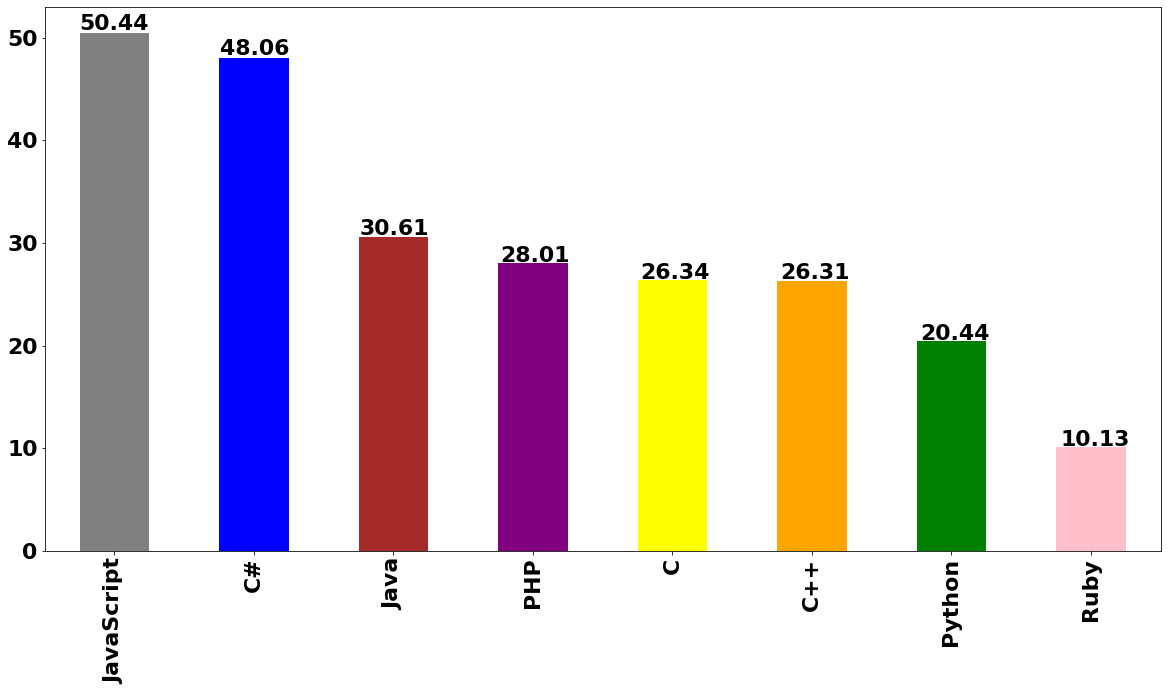

In [129]:
# plotting data
ax = s_2011_proficiencies_percentages['top ten proficiency percentages'].plot(kind="bar", color=languages_palette_list)

# annotating values on top of each bar, for readability
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))


Hence, 2011 top 5 ranking would be:
1. JavaScript
2. C#
3. Java
4. PHP
5. C <br>


#### 2012 Results Analysis
Now I'll compute the answer to first question, referring to 2012 data:


In [130]:
proficiency_columns_range_2012 = range(22,35)

# instantiating  a LanguagesStatsExtractor object
lre_12 = LanguagesRankingExtractor(df_surveys_12, columns_selection_criteria=proficiency_columns_range_2012, prefix_to_remove='Proficient in ')
# computing languages proficiency ranking in 2011
s_2012_proficiencies_stats = lre_12.get_stats()

In [131]:
# having a look at top ten most popular languages in 2011
s_2012_proficiencies_top_10 = s_2012_proficiencies_stats['top ten']
s_2012_proficiencies_top_10

SQL            3294
JavaScript     3127
CSS            2824
C#             2468
Java           2348
PHP            1925
C++            1526
C              1484
Python         1210
Objective-C     605
dtype: int64

Since we observed a few "non programming" languages in our top ten, we'd better look at the full ranking in order to spot and eliminate all of this kind of occurrence from the data:

In [132]:
s_2012_proficiencies_stats["full ranking"]

Proficient in SQL            3294
Proficient in JavaScript     3127
Proficient in CSS            2824
Proficient in C#             2468
Proficient in Java           2348
Proficient in PHP            1925
Proficient in C++            1526
Proficient in C              1484
Proficient in Python         1210
Proficient in Objective-C     605
Proficient in Ruby            577
Proficient in Perl            461
dtype: int64

Again in top 10 we have SQL, CSS and HTML5 that are not programming languages and shall be removed from the top ten.

In [133]:
# dropping SQL and CSS from results
exclusion_list = ["Proficient in SQL", "Proficient in CSS"]
# computing top ten languages by proficiency in 2011

lre_12 = LanguagesRankingExtractor(df_surveys_12, columns_selection_criteria=proficiency_columns_range_2012, prefix_to_remove='Proficient in ', exclusion_list=exclusion_list)
# computing languages proficiency ranking in 2011
s_2012_proficiencies_stats = lre_12.get_stats()

Looking again at top proficiencies:

In [134]:
# having a look at top ten most popular languages in 2011
s_2012_proficiencies_top_10 = s_2011_proficiencies_stats['top ten']
s_2012_proficiencies_top_10

JavaScript    1419
C#            1352
Java           861
PHP            788
C              741
C++            740
Python         575
Ruby           285
dtype: int64

### Color Palette integration

Now I'll add missing languages to palette dictionary:

In [135]:
languages_palette

{'C': 'yellow',
 'C++': 'orange',
 'Python': 'green',
 'PHP': 'purple',
 'Ruby': 'pink',
 'JavaScript': 'grey',
 'C#': 'blue',
 'Java': 'brown',
 'Perl': '#add8e6'}

In [136]:
languages_palette['Objective-C'] = "#6699cc"

We can now assess the language popularity in absolute terms computing total percentage of coders using that
particular language:


In [137]:
# computing percentages
lpp_12 = LanguagesProficienciesPercentages(lre_12)

s_2012_proficiencies_percentages = lpp_12.get_stats()

In [138]:
s_2012_proficiencies_percentages['proficiency percentages']

Proficient in JavaScript     50.088099
Proficient in C#             39.532276
Proficient in Java           37.610123
Proficient in PHP            30.834535
Proficient in C++            24.443377
Proficient in C              23.770623
Proficient in Python         19.381708
Proficient in Objective-C     9.690854
Proficient in Ruby            9.242351
Proficient in Perl            7.384270
dtype: float64

In [139]:
s_2012_proficiencies_percentages['top ten proficiency percentages']

JavaScript     50.088099
C#             39.532276
Java           37.610123
PHP            30.834535
C++            24.443377
C              23.770623
Python         19.381708
Objective-C     9.690854
Ruby            9.242351
Perl            7.384270
dtype: float64

Mapping languages to related assigned color:


In [140]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2012_proficiencies_percentages['top ten proficiency percentages'])

### Histogram of most popular languages in 2012

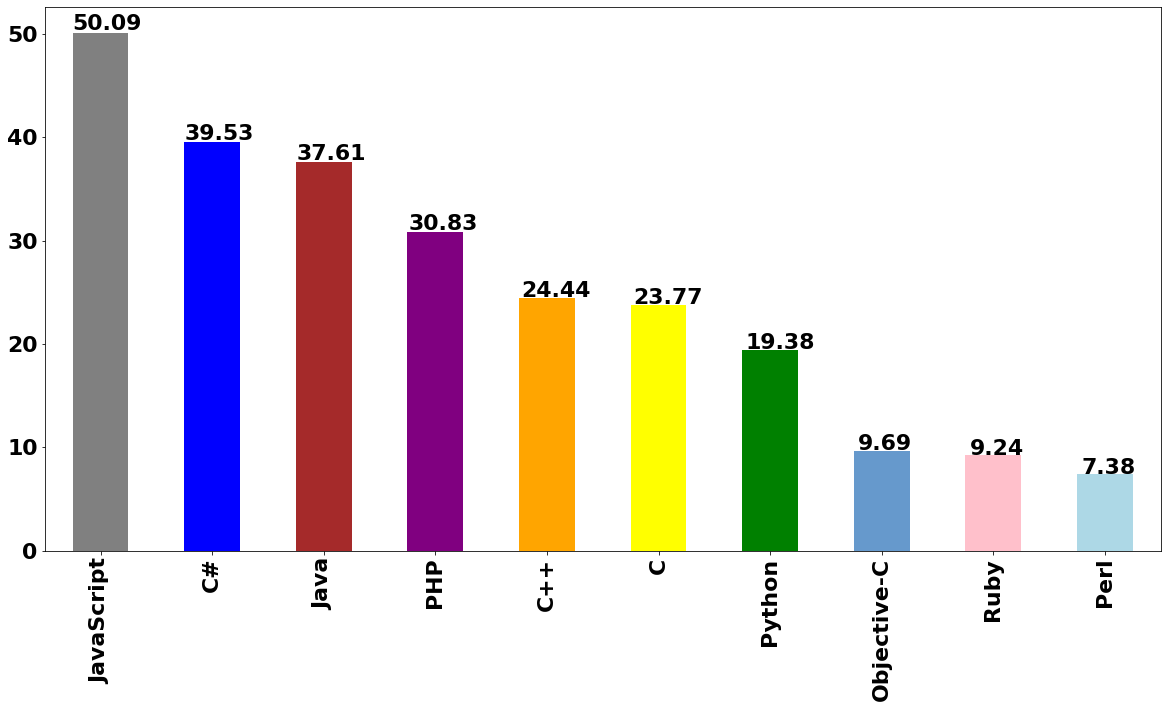

In [141]:
# plotting data
ax_12 = s_2012_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_12.patches:
    ax_12.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2012 are: <br>
1. JavaScript
2. C#
3. Java
4. PHP
5. C++ </br>

Three main facts can be noted from this year results analysis:
1. C++ just overtook is "father" language C at 5th place
2. C# that is not as popular as it was in 2011
3. Objective-C has gained its first top ten appearance (this is pro-

#### 2013 Results Analysis
Now I'll compute the answer to first question, referring to 2013 data:

In [142]:
proficiency_columns_range_2013 = range(56,69)

# instantiating  a LanguagesStatsExtractor object
lre_13 = LanguagesRankingExtractor(df_surveys_13, columns_selection_criteria=proficiency_columns_range_2013, prefix_to_remove='Proficient in ')
# computing languages proficiency ranking in 2013
s_2013_proficiencies_stats = lre_13.get_stats()


Looking at top ten languages in 2013

In [143]:
# having a look at top ten most popular languages in 2013
s_2013_proficiencies_top_10 = s_2013_proficiencies_stats['top ten']
s_2013_proficiencies_top_10

JavaScript     4735
jQuery         4109
C#             3027
Java           3020
PHP            2324
Python         1880
C++            1696
C              1436
Objective-C     955
Ruby            794
dtype: int64

In [144]:
s_2013_proficiencies_stats["full ranking"]

Proficient in JavaScript     4735
Proficient in jQuery         4109
Proficient in C#             3027
Proficient in Java           3020
Proficient in PHP            2324
Proficient in Python         1880
Proficient in C++            1696
Proficient in C              1436
Proficient in Objective-C     955
Proficient in Ruby            794
Proficient in Node.js         599
Proficient in JQuery          239
dtype: int64

I have to merge jQuery (which is actually a library) and Node.js to JavaScript,
in order to have a clean view on data:

In [145]:
# merge list
entries_merge_list = [("JavaScript", "jQuery"), ("JavaScript", "Node.js"), ("JavaScript", "JQuery")]
# instantiating  a LanguagesStatsExtractor object
lre_13 = LanguagesRankingExtractor(df_surveys_13, columns_selection_criteria=lang_prof_CROI_2013, prefix_to_remove='Proficient in ', entries_merge_list=entries_merge_list)
# computing languages proficiency ranking in 2013
s_2013_proficiencies_stats = lre_13.get_stats()

/home/alfonso/anaconda3/envs/ml-ds/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/alfonso/anaconda3/envs/ml-ds/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Looking at clean top ten data from 2013:

In [146]:
# having a look at top ten most popular languages in 2013
s_2013_proficiencies_top_10 = s_2013_proficiencies_stats['top ten']
s_2013_proficiencies_top_10

JavaScript     5149
C#             3027
Java           3020
PHP            2324
Python         1880
C++            1696
C              1436
Objective-C     955
Ruby            794
dtype: int64

We can assess the language popularity in absolute terms computing total percentage of coders using that
particular language:


In [147]:
# computing percentages
lpp_13 = LanguagesProficienciesPercentages(lre_13)

s_2013_proficiencies_percentages = lpp_13.get_stats()

In [148]:
s_2013_proficiencies_percentages['proficiency percentages']

Proficient in JavaScript     52.853623
Proficient in C#             31.071649
Proficient in Java           30.999795
Proficient in PHP            23.855471
Proficient in Python         19.297885
Proficient in C++            17.409156
Proficient in C              14.740300
Proficient in Objective-C     9.802915
Proficient in Ruby            8.150277
dtype: float64

In [149]:
s_2013_proficiencies_percentages['top ten proficiency percentages']

JavaScript     52.853623
C#             31.071649
Java           30.999795
PHP            23.855471
Python         19.297885
C++            17.409156
C              14.740300
Objective-C     9.802915
Ruby            8.150277
dtype: float64

Mapping languages to related assigned color:


In [150]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2013_proficiencies_percentages['top ten proficiency percentages'])

### Histogram of most popular languages in 2013

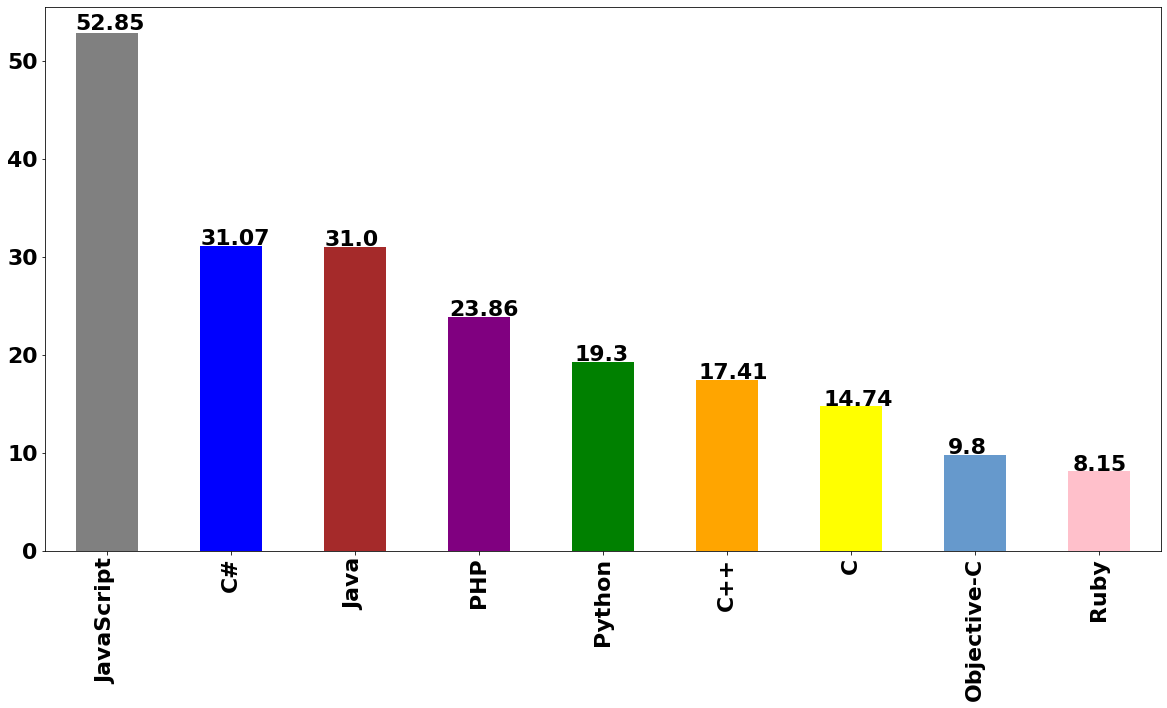

In [151]:
# plotting data

ax_13 = s_2013_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_13.patches:
    ax_13.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2013: <br>
1. JavaScript
2. C#
3. Java
4. PHP
5. Python <br>

Once more, in 2013 JavaScript was the most used language. Considering jQuery and Node.js as additional JavaScript proficiencies, about half of the respondents knows JavaScript. Following (but not so close) we can find C# and Java <br> (they're almost tied).

#### 2014 Results Analysis
Now I'll compute the answer to first question, referring to 2014 data:


In [152]:
proficiency_columns_range_2014 = range(42,53)

# instantiating  a LanguagesStatsExtractor object
lre_14 = LanguagesRankingExtractor(df_surveys_14, columns_selection_criteria=proficiency_columns_range_2014, prefix_to_remove='Proficient in ')
# computing languages proficiency ranking in 2014
s_2014_proficiencies_stats = lre_14.get_stats()

In [153]:
# having a look at top ten most popular languages in 2013
s_2014_proficiencies_top_10 = s_2014_proficiencies_stats['top ten']
s_2014_proficiencies_top_10

JavaScript     3783
Java           2479
C#             2378
PHP            1710
Python         1473
C++            1418
C              1174
Objective-C     675
Node.js         641
Ruby            593
dtype: int64

Clearly, SQL and Node.js should be removed/merged with other entries. Let's have a look at full ranking before populating exclusion list.

In [154]:
s_2014_proficiencies_stats['full ranking']

Proficient in JavaScript     3783
Proficient in Java           2479
Proficient in C#             2378
Proficient in PHP            1710
Proficient in Python         1473
Proficient in C++            1418
Proficient in C              1174
Proficient in Objective-C     675
Proficient in Node.js         641
Proficient in Ruby            593
dtype: int64

In [155]:
entries_merge_list = [('JavaScript', 'Node.js')]

In [156]:
exclusion_list = ['Proficient in SQL']

In [157]:
# computing top ten languages by proficiency in 2013
# instantiating  a LanguagesStatsExtractor object


lre_14 = LanguagesRankingExtractor(df_surveys_14, columns_selection_criteria=proficiency_columns_range_2014, prefix_to_remove='Proficient in ', exclusion_list=exclusion_list, entries_merge_list=entries_merge_list)
# computing languages proficiency ranking in 2014
s_2014_proficiencies_stats = lre_14.get_stats()

error finding feature in axis
error finding feature in axis


In [158]:
# having a look at top ten most popular languages in 2014
s_2014_proficiencies_stats['top ten']

JavaScript     3836
Java           2479
C#             2378
PHP            1710
Python         1473
C++            1418
C              1174
Objective-C     675
Ruby            593
dtype: int64

We can assess the language popularity in absolute terms computing total percentage of coders using that
particular language:


In [159]:
# computing percentages
lpp_14 = LanguagesProficienciesPercentages(lre_14)

s_2014_proficiencies_percentages = lpp_14.get_stats()

error finding feature in axis
error finding feature in axis


In [160]:
s_2014_proficiencies_percentages['proficiency percentages']

Proficient in JavaScript     50.189716
Proficient in Java           32.434908
Proficient in C#             31.113437
Proficient in PHP            22.373414
Proficient in Python         19.272537
Proficient in C++            18.552924
Proficient in C              15.360461
Proficient in Objective-C     8.831611
Proficient in Ruby            7.758733
dtype: float64

In [161]:
s_2014_proficiencies_percentages['top ten proficiency percentages']

JavaScript     50.189716
Java           32.434908
C#             31.113437
PHP            22.373414
Python         19.272537
C++            18.552924
C              15.360461
Objective-C     8.831611
Ruby            7.758733
dtype: float64

Mapping languages to related assigned color:


In [257]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2014_proficiencies_percentages['top ten proficiency percentages'])

### Histogram of most popular languages in 2014

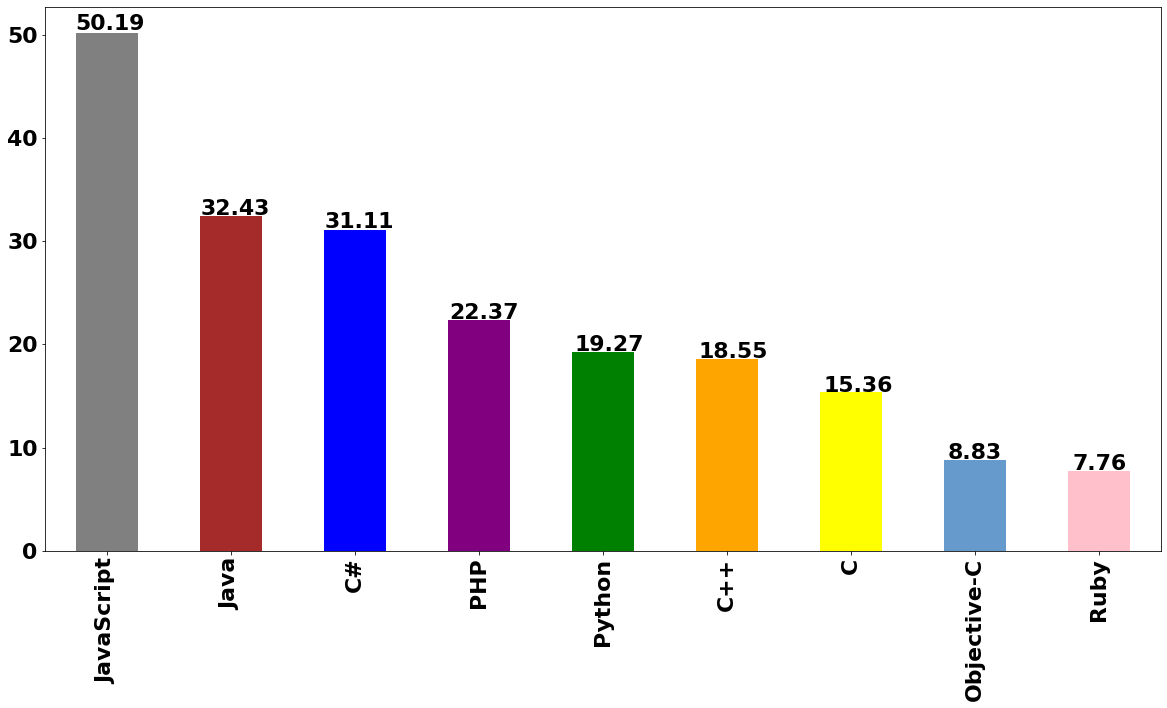

In [260]:
# plotting data

ax_14 = s_2014_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_14.patches:
    ax_14.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))


Top 5 languages in 2014: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python

#### 2015 Results Analysis
Now I'll compute the answer to first question, referring to 2015 data:

In [261]:
# instantiating  a LanguagesStatsExtractor object
lre_15 = LanguagesRankingExtractor(df_surveys_15, columns_selection_criteria=lang_prof_CROI_2015, prefix_to_remove='Current Lang & Tech: ')
# computing languages proficiency ranking in 2013
s_2015_proficiencies_stats = lre_15.get_stats()

In [262]:
# having a look at top ten most popular languages in 2015
s_2015_proficiencies_top_10 = s_2015_proficiencies_stats['top ten']
s_2015_proficiencies_top_10

JavaScript    11962
SQL            9439
Java           8219
C#             6949
PHP            6529
Python         5238
C++            4529
SQL Server     4129
Android        4110
C              3612
dtype: int64

SQL, SQL Server and Android are not programming languages  and have to be excluded from computations:

From the moment we may have other non-languages involved, let's have a look at full ranking before compiling exclusion list:

In [263]:
s_2015_proficiencies_stats['full ranking']

Current Lang & Tech: JavaScript       11962
Current Lang & Tech: SQL               9439
Current Lang & Tech: Java              8219
Current Lang & Tech: C#                6949
Current Lang & Tech: PHP               6529
Current Lang & Tech: Python            5238
Current Lang & Tech: C++               4529
Current Lang & Tech: SQL Server        4129
Current Lang & Tech: Android           4110
Current Lang & Tech: C                 3612
Current Lang & Tech: Node.js           2919
Current Lang & Tech: AngularJS         2913
Current Lang & Tech: iOS               1956
Current Lang & Tech: LAMP              1926
Current Lang & Tech: C++11             1851
Current Lang & Tech: Ruby              1765
Current Lang & Tech: MongoDB           1745
Current Lang & Tech: Objective-C       1719
Current Lang & Tech: Visual Basic      1701
Current Lang & Tech: Arduino           1626
Current Lang & Tech: Cloud             1410
Current Lang & Tech: Redis              873
Current Lang & Tech: Matlab     

In [264]:
exclusion_list = ["Current Lang & Tech: SQL", "Current Lang & Tech: SQL Server", "Current Lang & Tech: Android",
                  "Current Lang & Tech: iOS", "Current Lang & Tech: LAMP", "Current Lang & Tech: C++11", "Current Lang & Tech: MongoDB",
                  "Current Lang & Tech: Arduino", "Current Lang & Tech: Cloud", "Current Lang & Tech: Redis", "Current Lang & Tech: Cordova",
                  "Current Lang & Tech: Windows Phone", "Current Lang & Tech: Sharepoint", "Current Lang & Tech: Hadoop", "Current Lang & Tech: Cassandra",
                  "Current Lang & Tech: Salesforce", "Current Lang & Tech: Spark"]

entries_merge_list = [("JavaScript", "Node.js"), ("JavaScript", "AngularJS")]

In [265]:
# instantiating  a LanguagesStatsExtractor object
lre_15 = LanguagesRankingExtractor(df_surveys_15, columns_selection_criteria=lang_prof_CROI_2015, exclusion_list=exclusion_list, prefix_to_remove='Current Lang & Tech: ', entries_merge_list=entries_merge_list)
# computing languages proficiency ranking in 2013
s_2015_proficiencies_stats = lre_15.get_stats()

In [266]:
# having a look at top ten most popular languages in 2015
s_2015_proficiencies_top_10 = s_2015_proficiencies_stats['top ten']
s_2015_proficiencies_top_10

JavaScript      12433
Java             8219
C#               6949
PHP              6529
Python           5238
C++              4529
C                3612
Ruby             1765
Objective-C      1719
Visual Basic     1701
dtype: int64

We can now assess the language popularity in absolute terms computing total percentage
of coders using that particular language:

In [267]:
# computing percentages
lpp_15 = LanguagesProficienciesPercentages(lre_15)

s_2015_proficiencies_percentages = lpp_15.get_stats()

In [268]:
s_2015_proficiencies_percentages['proficiency percentages']

Current Lang & Tech: JavaScript      47.661581
Current Lang & Tech: Java            31.507322
Current Lang & Tech: C#              26.638810
Current Lang & Tech: PHP             25.028751
Current Lang & Tech: Python          20.079736
Current Lang & Tech: C++             17.361803
Current Lang & Tech: C               13.846508
Current Lang & Tech: Ruby             6.766081
Current Lang & Tech: Objective-C      6.589742
Current Lang & Tech: Visual Basic     6.520739
Current Lang & Tech: Matlab           3.296788
Current Lang & Tech: CoffeeScript     3.001610
Current Lang & Tech: Swift            2.909607
Current Lang & Tech: R                2.894273
Current Lang & Tech: Perl             2.829104
Current Lang & Tech: Scala            2.062409
Current Lang & Tech: Go               1.771065
Current Lang & Tech: Haskell          1.368550
Current Lang & Tech: Clojure          0.674691
Current Lang & Tech: F#               0.667024
Current Lang & Tech: Dart             0.417849
Current Lang 

In [269]:
s_2015_proficiencies_percentages['top ten proficiency percentages']

JavaScript      47.661581
Java            31.507322
C#              26.638810
PHP             25.028751
Python          20.079736
C++             17.361803
C               13.846508
Ruby             6.766081
Objective-C      6.589742
Visual Basic     6.520739
dtype: float64

Mapping languages to related assigned color:


In [270]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2015_proficiencies_percentages['top ten proficiency percentages'])

In [271]:
# Savoy Blue
languages_palette['Visual Basic'] = "#0A36AF"

### Histogram of most popular languages in 2015

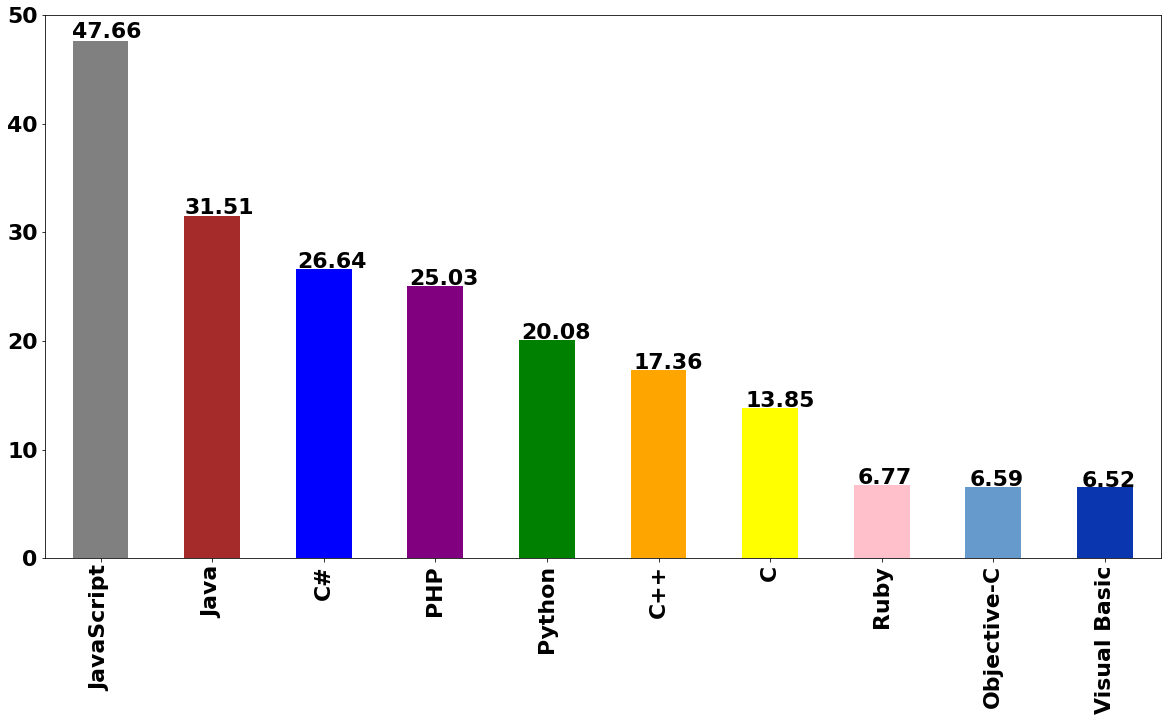

In [272]:
# plotting data
ax_15 = s_2015_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_15.patches:
    ax_15.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2015: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python



Top 5 languages standings, in 2015 was unchanged respect to 2014.

#### 2016 Results Analysis
Now I'll compute the answer to first question, referring to 2016 data:


In [273]:
# instantiating  a LanguagesStatsExtractor object
lre_16 = LanguagesRankingExtractor(df_surveys_16, columns_selection_criteria=lang_prof_CROI_2016, prefix_to_remove='tech_do: ')

# computing languages proficiency ranking in 2013
s_2016_proficiencies_stats = lre_16.get_stats()

In [274]:
s_2016_proficiencies_stats['top ten']

JavaScript    27385.0
Java          17942.0
C#            15283.0
PHP           12780.0
Python        12282.0
C++            9589.0
AngularJS      8823.0
Android        8601.0
Node.js        8509.0
C              7678.0
dtype: float64

[AngularJS](https://en.wikipedia.org/wiki/AngularJS) and [Node.js](https://en.wikipedia.org/wiki/Node.js) are JavaScript-based framework, hence, it should be merged with JavaScript. Let's have a look at full ranking before proceeding to data cleaning parameters initialization:

In [275]:
s_2016_proficiencies_stats['full ranking']

tech_do: JavaScript                       27385.0
tech_do: Java                             17942.0
tech_do: C#                               15283.0
tech_do: PHP                              12780.0
tech_do: Python                           12282.0
tech_do: C++                               9589.0
tech_do: AngularJS                         8823.0
tech_do: Android                           8601.0
tech_do: Node.js                           8509.0
tech_do: C                                 7678.0
tech_do: LAMP                              4821.0
tech_do: MongoDB                           4780.0
tech_do: Cloud (AWS, GAE, Azure, etc.)     4629.0
tech_do: iOS                               4498.0
tech_do: Ruby                              4383.0
tech_do: Arduino / Raspberry Pi            3797.0
tech_do: Objective-C                       3202.0
tech_do: Redis                             2862.0
tech_do: ReactJS                           2541.0
tech_do: CoffeeScript                      1662.0


In [276]:
exclusion_list = ["tech_do: LAMP", "tech_do: MongoDB", "tech_do: Cloud (AWS, GAE, Azure, etc.)", "tech_do: iOS", "tech_do: Arduino / Raspberry Pi",
                  "tech_do: Redis", "tech_do: Cordova", "tech_do: Hadoop", "tech_do: Salesforce", "tech_do: Cassandra"]
entries_merge_list = [("JavaScript", "AngularJS"), ("JavaScript", "Node.js"), ("JavaScript", "ReactJS")]

In [277]:
lre_16 = LanguagesRankingExtractor(df_surveys_16, columns_selection_criteria=lang_prof_CROI_2016, prefix_to_remove='tech_do: ', exclusion_list= exclusion_list, entries_merge_list=entries_merge_list)

In [278]:
s_2016_proficiencies_stats = lre_16.get_stats()

In [279]:
s_2016_proficiencies_stats['top ten']

JavaScript     28904.0
Java           17942.0
C#             15283.0
PHP            12780.0
Python         12282.0
C++             9589.0
Android         8601.0
C               7678.0
Ruby            4383.0
Objective-C     3202.0
dtype: float64

We can now assess the language popularity in absolute terms computing total percentage
of coders using that particular language:

In [280]:
# computing percentages
lpp_16 = LanguagesProficienciesPercentages(lre_16)

s_2016_proficiencies_percentages = lpp_16.get_stats()

In [281]:
s_2016_proficiencies_percentages['proficiency percentages']

tech_do: JavaScript      51.586650
tech_do: Java            32.022131
tech_do: C#              27.276459
tech_do: PHP             22.809209
tech_do: Python          21.920400
tech_do: C++             17.114046
tech_do: Android         15.350705
tech_do: C               13.703373
tech_do: Ruby             7.822595
tech_do: Objective-C      5.714796
tech_do: CoffeeScript     2.966268
tech_do: R                2.912725
tech_do: Perl             2.898447
tech_do: Matlab           2.859183
tech_do: Go               2.761021
tech_do: Haskell          1.451008
tech_do: Clojure          0.992326
tech_do: F#               0.863823
tech_do: Rust             0.778155
tech_do: Dart             0.396216
dtype: float64

In [282]:
s_2016_proficiencies_percentages['top ten proficiency percentages']

JavaScript     51.586650
Java           32.022131
C#             27.276459
PHP            22.809209
Python         21.920400
C++            17.114046
Android        15.350705
C              13.703373
Ruby            7.822595
Objective-C     5.714796
dtype: float64

In [283]:
# Spindle Tree color
languages_palette['Android'] = "#6D8F3E"

In [284]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2016_proficiencies_percentages['top ten proficiency percentages'])

### Histogram of most popular languages in 2016

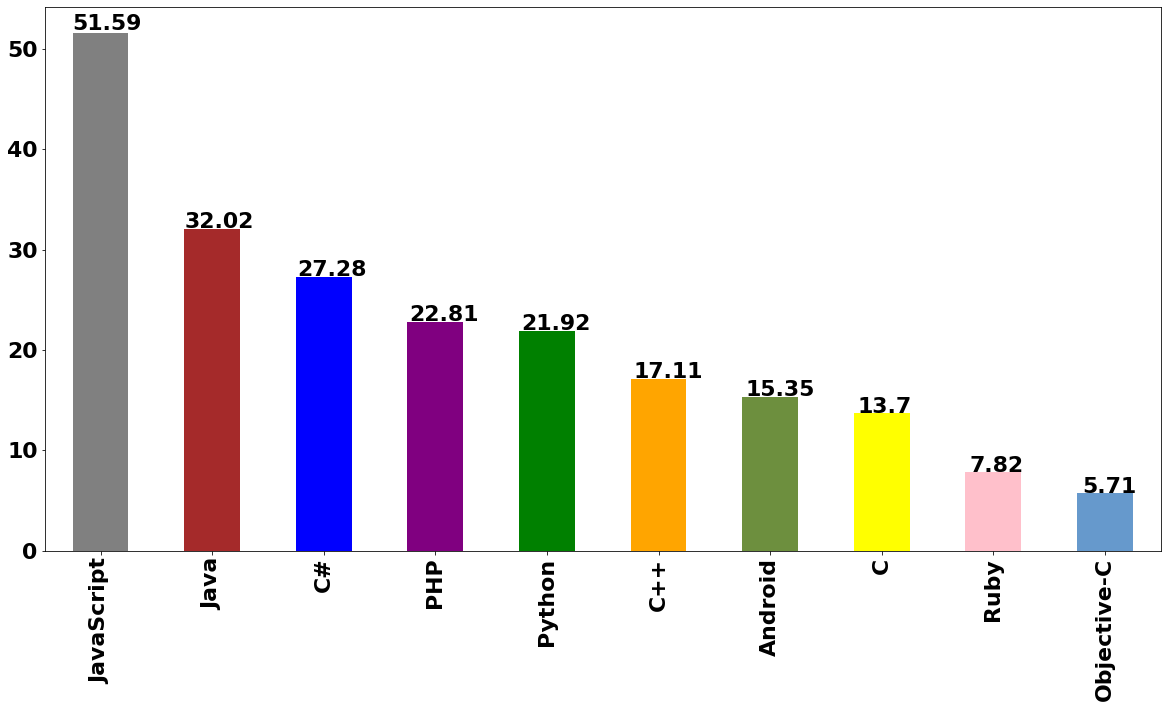

In [285]:
# plotting data
ax_16 = s_2016_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_16.patches:
    ax_16.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2015: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python



Top 5 languages standings, in 2016 was unchanged respect to 2015, some minor changes in other top ten position has occurred, in particular, Visual Basic has been replaced by the new entry Android.

Top 5 languages in 2016: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python<br>

#### 2017 Results Analysis
Now I'll compute the answer to first question, referring to 2017 data:


In [ ]:
# computing proficiencies for 2017 data
df_2017_proficiencies = df_surveys_17.filter(like='HaveWorkedLanguage')
s_2017_proficiencies = df_2017_proficiencies.sum(axis=0)
s_2017_proficiencies.sort_values(ascending=False).head(10)

Top 5 languages in 2017: <br>
1. JavaScript
2. Java
3. C#
4. Python
5. PHP <br>

This year, python overtook PHP at the 4th place, and is growing in popularity.



#### 2018 Results Analysis
Now I'll compute the answer to first question, referring to 2018 data:


In [ ]:
# computing proficiencies for 2018 data
df_2018_proficiencies = df_surveys_18.filter(like='LanguageWorkedWith')
s_2018_proficiencies = df_2018_proficiencies.sum(axis=0)
s_2018_proficiencies.sort_values(ascending=False).head(10)


Top 5 languages in 2018: <br>
1. JavaScript
2. Java
3. Python
4. C#
5. PHP<br>

This year, python overtook C#, and is still growing in popularity.

#### 2019 Results Analysis
Now I'll compute the answer to first question, referring to 2019 data:

In [ ]:
# computing proficiencies for 2019 data
df_2019_proficiencies = df_surveys_19.filter(like='LanguageWorkedWith')
s_2019_proficiencies = df_2019_proficiencies.sum(axis=0)
s_2019_proficiencies.sort_values(ascending=False).head(10)


Top 5 languages in 2019: <br>
1. JavaScript
2. Python
3. Java
4. C#
5. PHP <br>

This year, Python overtook Java, and is still growing.

#### 2020 Results Analysis
Now I'll compute the answer to first question, referring to 2020 data:


In [ ]:
# computing proficiencies for 2020 data
df_2020_proficiencies = df_surveys_20.filter(like='LanguageWorkedWith')
s_2020_proficiencies = df_2020_proficiencies.sum(axis=0)
s_2020_proficiencies.sort_values(ascending=False).head(10)


Top 5 languages in 2020: <br>
Top 5 languages in 2021: <br>
1. JavaScript
2. Python
3. Java
4. C#
5. TypeScript <br>

In 2020, we had a quite stable top three languages.

#### 2021 Results Analysis
Now I'll compute the answer to first question, referring to 2021 data:


In [ ]:
# computing proficiencies for 2021 data
df_2021_proficiencies = df_surveys_21.filter(like='LanguageHaveWorkedWith')
s_2021_proficiencies = df_2021_proficiencies.sum(axis=0)
s_2021_proficiencies.sort_values(ascending=False).head(10)


Top 5 languages in 2021: <br>
1. JavaScript
2. Python
3. Java
4. TypeScript
5. C#<br>

This year, Python strengthen its 2nd position respect to Java and reduced the gap with JavaScript.

Now I'll proceed with trend analysis, in the following notebook.<br/>
To do so, once again, I'll need to store data from the current notebook.


In [ ]:
%store s_2011_proficiencies
%store s_2012_proficiencies
%store s_2013_proficiencies
%store s_2014_proficiencies
%store s_2015_proficiencies
%store s_2016_proficiencies
%store s_2017_proficiencies
%store s_2018_proficiencies
%store s_2019_proficiencies
%store s_2020_proficiencies
%store s_2021_proficiencies